In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [25]:
# Load the file
data = pd.read_excel("player_google_search_results.xlsx")

In [26]:
# Position replacements dictionary
position_replacements = {
    'LWF': 'LW', 'RWF': 'RW', 'RCMF': 'CM', 'LCMF': 'CM', 'LDMF': 'DMF',
    'RDMF': 'DMF', 'LCB': 'CB', 'RCB': 'CB', 'RAMF': 'AMF', 'LAMF': 'AMF'
}

# Function to replace positions, taking only the first position
def replace_first_position(position_str):
    first_position = position_str.split(", ")[0]
    return position_replacements.get(first_position, first_position)

# Apply the replacement function
data['Position'] = data['Position'].apply(replace_first_position)


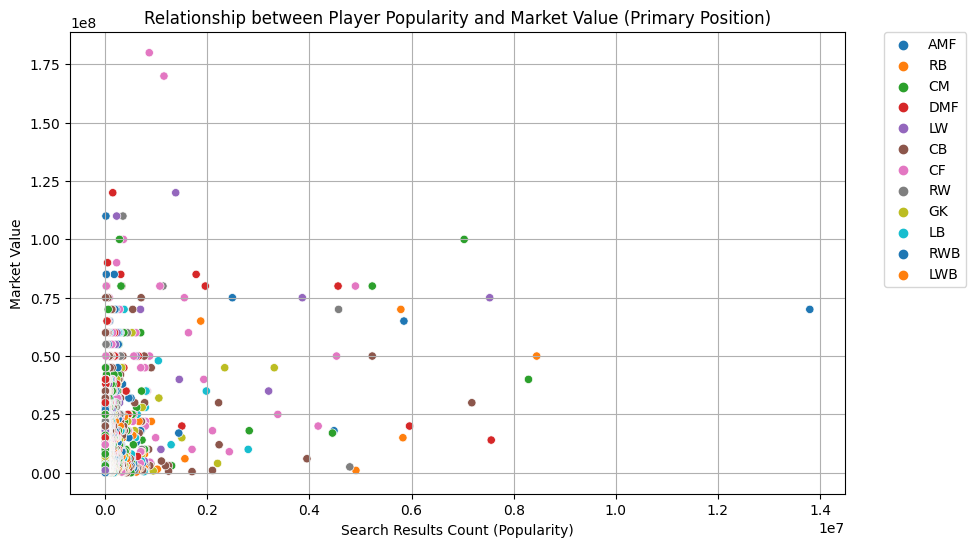

In [27]:
# Scatter plot with updated position data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Search Results Count', y='Market value', hue='Position', palette='tab10')
plt.title('Relationship between Player Popularity and Market Value (Primary Position)')
plt.xlabel('Search Results Count (Popularity)')
plt.ylabel('Market Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

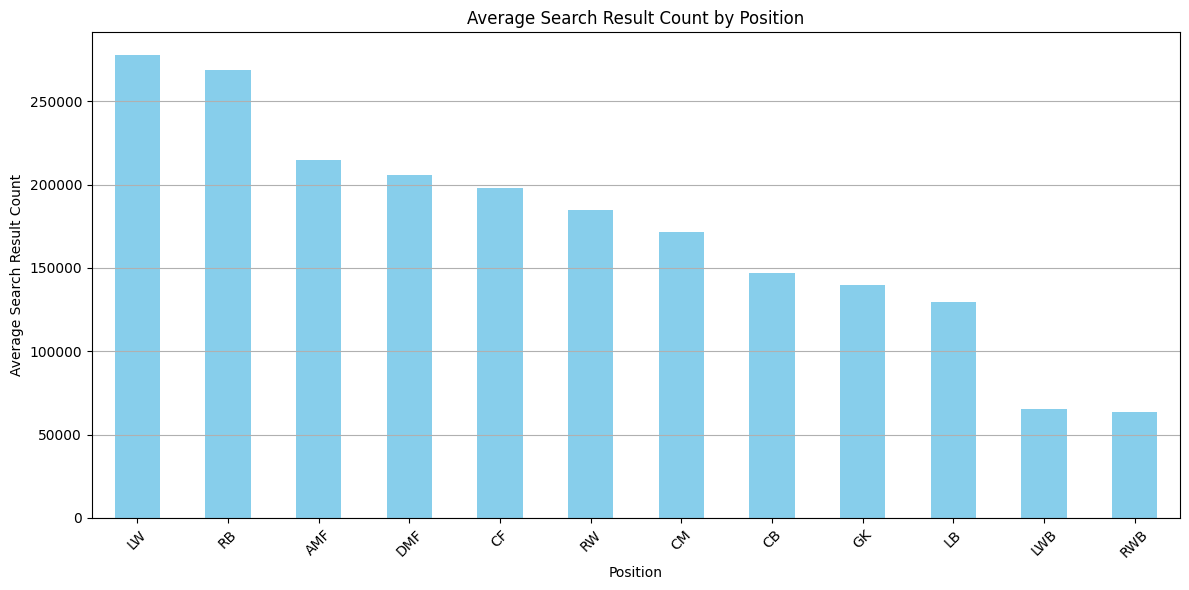

In [28]:
# Average Search Result Count by Position
avg_search_by_position = data.groupby('Position')['Search Results Count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_search_by_position.plot(kind='bar', color='skyblue')
plt.title('Average Search Result Count by Position')
plt.xlabel('Position')
plt.ylabel('Average Search Result Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
# Compute the correlation coefficient
correlation = data['Search Results Count'].corr(data['Market value'])
print(correlation)

0.3084356498289865


In [30]:
# Define bins based on the distribution of 'Search Results Count'
bins = [0, filtered_data['Search Results Count'].quantile(0.33), 
        filtered_data['Search Results Count'].quantile(0.66), 
        filtered_data['Search Results Count'].max()]

labels = ['Low', 'Medium', 'High']

# Create a new column 'Popularity Bin' to store bin labels
filtered_data['Popularity Bin'] = pd.cut(filtered_data['Search Results Count'], bins=bins, labels=labels, include_lowest=True)

# Compute the average market value for each bin
avg_market_value_by_bin = filtered_data.groupby('Popularity Bin')['Market value'].mean()

avg_market_value_by_bin

Popularity Bin
Low       4.235137e+06
Medium    9.963754e+06
High      1.453370e+07
Name: Market value, dtype: float64

In [33]:
#three bins and compute the average and standard deviation for each bin
filtered_data['Popularity Bin'] = pd.cut(filtered_data['Search Results Count'], bins=bins, labels=labels, include_lowest=True)
avg_market_value_by_bin = filtered_data.groupby('Popularity Bin')['Market value'].mean()
std_dev_by_bin = filtered_data.groupby('Popularity Bin')['Market value'].std()

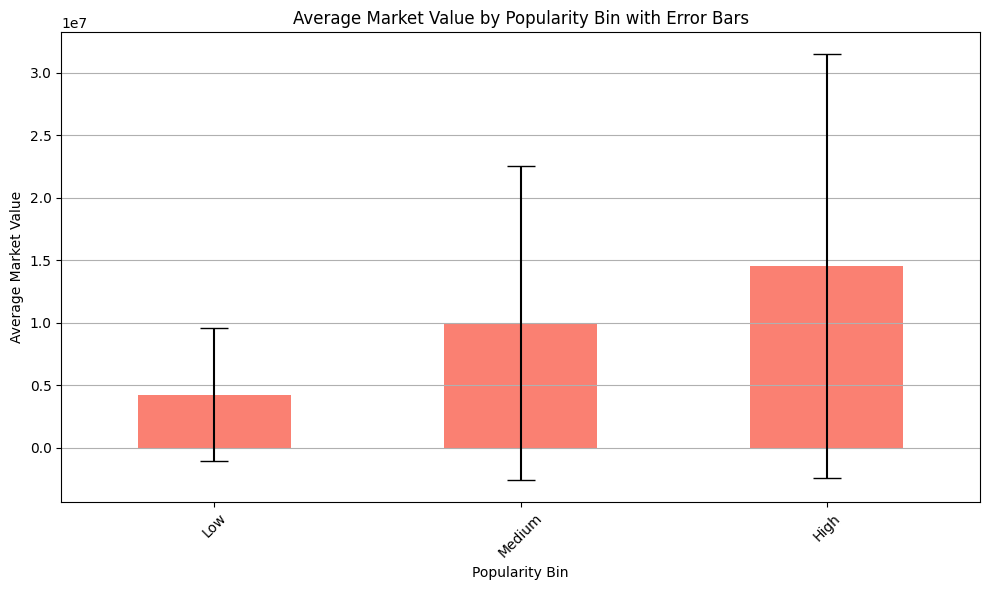

In [35]:
# Bar chart with error bars for average market value by the three bins
plt.figure(figsize=(10, 6))
avg_market_value_by_bin.plot(kind='bar', yerr=std_dev_by_bin, color='salmon', capsize=10)
plt.title('Average Market Value by Popularity Bin with Error Bars')
plt.xlabel('Popularity Bin')
plt.ylabel('Average Market Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [38]:
# Define the independent variable (X) and the dependent variable (y)
X = filtered_data['Search Results Count']
y = filtered_data['Market value']

# Add a constant to the independent variable (a requirement for the statsmodels regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary statistics of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Market value   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     165.6
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.29e-36
Time:                        18:40:36   Log-Likelihood:                -33338.
No. Observations:                1875   AIC:                         6.668e+04
Df Residuals:                    1873   BIC:                         6.669e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  7.01e+06   3.58e+05     19.581      0.000    6.31e+06    7.71e+06
Search Results Count    75.7573      5.888     12.867      0.000      64.210      87.305
==============================================================================
Omnibus:                     1170.802   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13480.459
Skew:                           2.798   Prob(JB):                         0.00
Kurtosis:                      14.884   Cond. No.                     7.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

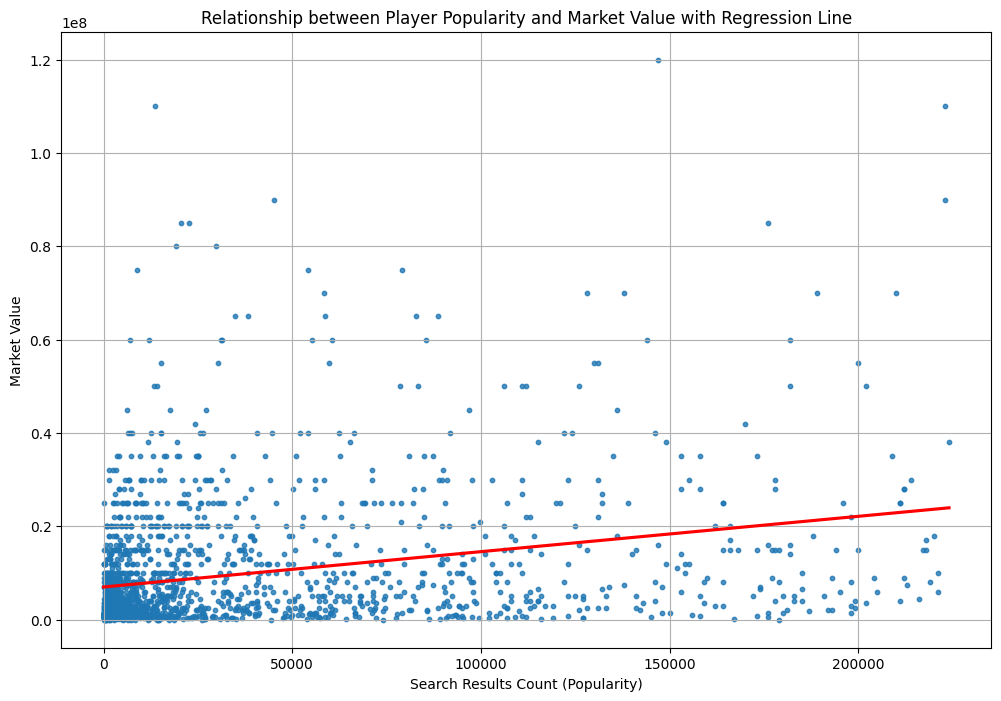

In [39]:
# Scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Search Results Count', y='Market value', data=filtered_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Player Popularity and Market Value with Regression Line')
plt.xlabel('Search Results Count (Popularity)')
plt.ylabel('Market Value')
plt.grid(True)
plt.show()